# Projekt 2
## Analiza zbioru danych **"e-shop clothing 2008"**
## Kamień milowy 2: Model
Autorzy: Laura Hoang, Piotr Bielecki

In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import seaborn as sns

In [32]:
with open("e-shop data and description/e-shop clothing 2008 data description.txt", "r") as f:
    print(f.read())
    f.close()

Data description “e-shop clothing 2008”

Variables:

1. YEAR (2008)


2. MONTH -> from April (4) to August (8)


3. DAY -> day number of the month


4. ORDER -> sequence of clicks during one session


5. COUNTRY -> variable indicating the country of origin of the IP address with the 
following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)


6. SESSION ID -> variable indicating session id (short record)


7. PAGE 1 (MAIN CATEGORY) 

#### Import danych

In [3]:
data = pd.read_csv('e-shop data and description/e-shop clothing 2008.csv', sep=';')
data

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


Po poprzednim kamieniu milowym ustaliliśmy kilka kwestii:
- zdecydowaliśmy się na klasteryzację po **kategoriach produktów**
- utworzymy kolumnę z dniem tygodnia, gdyż taki format dat jaki mamy jest niewygodny do pracy i wnosi dla nas za mało informacji
- usuniemy kolumny `price` i `price 2`, gdyż ten zbiór danych mógłby być przeznaczony do tego, aby w przyszłości przewidywać ceny produktów

#### Data preprocessing

Tak jak ustaliliśmy powyżej, dodamy kolumnę `weekday` z dniem tygodnia wygenerowanym z dat.

In [4]:
import datetime

weekdays = []
for (yr, mth, day) in zip(data.year, data.month, data.day):
    weekdays += [datetime.datetime(yr, mth, day).weekday()]

data['weekday'] = weekdays
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]

# 0- poniedzialek, 6- niedziela
data

,weekday,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,1,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,1,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,1,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,1,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


Kolumna `year` osiaga tylko jedna wartość (2008), przez co nie wnosi dla nas dużo informacji. Dlatego zostanie ona usunięta.

In [5]:
data = data.drop(columns=['year'])
data

,weekday,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,1,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,1,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,1,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,1,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,1,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2,8,13,2,34,24026,3,C2,12,1,1,43,1,1


Tak jak ustaliliśmy, usuniemy również kolumny `price` i `price 2`.

In [6]:
data = data.drop(columns=['price', 'price 2'])
data

,weekday,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,page
0,1,4,1,1,29,1,1,A13,1,5,1,1
1,1,4,1,2,29,1,1,A16,1,6,1,1
2,1,4,1,3,29,1,2,B4,10,2,1,1
3,1,4,1,4,29,1,2,B17,6,6,2,1
4,1,4,1,5,29,1,2,B8,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2,8,13,1,29,24024,2,B10,2,4,1,1
165470,2,8,13,1,9,24025,1,A11,3,4,1,1
165471,2,8,13,1,34,24026,1,A2,3,1,1,1
165472,2,8,13,2,34,24026,3,C2,12,1,1,1


#### Klasteryzacja po zmiennej `session ID` i dalszy preprocessing danych

In [7]:
# data_grouped = data.groupby(['session ID', 'weekday', 'month', 'day', 'country'])
# data_grouped

Kodowanie kolumny `page`

In [7]:
# from statistics import mode

# data_page = data_grouped['page'].agg([
#     ('avg_page', np.mean),
#     ('most_clicked_page', mode),
#     ('page_1_clicked', lambda x:len(x[x==1]) / len(x)),
#     ('page_2_clicked', lambda x:len(x[x==2]) / len(x)),
#     ('page_3_clicked', lambda x:len(x[x==3]) / len(x)),
#     ('page_4_clicked', lambda x:len(x[x==4]) / len(x)),
#     ('page_5_clicked', lambda x:len(x[x==5]) / len(x)),
#     ]).reset_index()
# data_page

Kodowanie kolumny `model photography`

In [8]:
# data_model_phot = data_grouped['model photography'].agg([
#     ('most_pop_model_phot', mode),
#     ('en_face', lambda x:len(x[x==1]) / len(x)),
#     ('profile', lambda x:len(x[x==2]) / len(x))
#     ]).reset_index()
# data_model_phot

Kodowanie kolumny `location`

In [9]:
# # 1-top left, 2-top in the middle, 3-top right, 4-bottom left, 5-bottom in the middle, 6-bottom right
# data_location = data_grouped['location'].agg([
#     ('most_pop_location', mode),
#     ('tl', lambda x:len(x[x==1]) / len(x)),
#     ('tm', lambda x:len(x[x==2]) / len(x)),
#     ('tr', lambda x:len(x[x==3]) / len(x)),
#     ('bl', lambda x:len(x[x==4]) / len(x)),
#     ('bm', lambda x:len(x[x==5]) / len(x)),
#     ('br', lambda x:len(x[x==6]) / len(x))
#     ]).reset_index()
# data_location

Kodowanie kolumny `colour`

In [10]:
# data_colour = data_grouped['colour'].agg([
#     ('most_pop_colour', mode)
# ]).reset_index()
# data_colour

Kodowanie kolumny `page 1 (main category)`

In [11]:
# # 1-trousers, 2-skirts, 3-blouses, 4-sale
# data_main_category = data_grouped['page 1 (main category)'].agg([
#     ('most_main_category', mode),
#     ('trousers', lambda x:len(x[x==1]) / len(x)),
#     ('skirts', lambda x:len(x[x==2]) / len(x)),
#     ('blouses', lambda x:len(x[x==3]) / len(x)),
#     ('sale', lambda x:len(x[x==4]) / len(x)),
# ]).reset_index()
# data_main_category

Połączenie danych z powstałych ramek danych

In [12]:
# data_preprocessed = pd.concat([
#     data_page,
#     data_model_phot[['most_pop_model_phot', 'en_face', 'profile']],
#     data_location[['most_pop_location', 'tl', 'tm', 'tr', 'bl', 'bm', 'br']],
#     data_colour['most_pop_colour'],
#     data_main_category[['most_main_category', 'trousers', 'skirts', 'blouses', 'sale']]
# ], axis=1)

# data_preprocessed

One-hot encoding

In [13]:
# encoded = pd.get_dummies(data_preprocessed['month'].astype(str))
# data_preprocessed = data_preprocessed.drop('month', axis=1)
# data_preprocessed = pd.concat([data_preprocessed, encoded], axis = 1)
# data_preprocessed.rename(columns={'4':'april', '5':'may', '6':'june' , '7':'july', '8':'august'}, inplace=True)
# data_preprocessed

In [14]:
# data_preprocessed['country'].unique()

In [15]:
# data_preprocessed['country'].value_counts()

In [16]:
# data_preprocessed['country'] = np.where(
#     (data_preprocessed['country']==29) & (data_preprocessed['country']==9),
#     'other', data_preprocessed['country']
# )

# data_preprocessed

In [17]:
# data_preprocessed.to_csv('e-shop data and description/e-shop_clothing_2008_processed.csv')

--------------------------------------------

In [10]:
data

,weekday,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,page
0,1,4,1,1,29,1,1,A13,1,5,1,1
1,1,4,1,2,29,1,1,A16,1,6,1,1
2,1,4,1,3,29,1,2,B4,10,2,1,1
3,1,4,1,4,29,1,2,B17,6,6,2,1
4,1,4,1,5,29,1,2,B8,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2,8,13,1,29,24024,2,B10,2,4,1,1
165470,2,8,13,1,9,24025,1,A11,3,4,1,1
165471,2,8,13,1,34,24026,1,A2,3,1,1,1
165472,2,8,13,2,34,24026,3,C2,12,1,1,1


In [11]:
# usuwanac cala kolumne czy usunac pierwsza litere? 
data = data.drop(columns=['page 2 (clothing model)'])
data

,weekday,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,page
0,1,4,1,1,29,1,1,1,5,1,1
1,1,4,1,2,29,1,1,1,6,1,1
2,1,4,1,3,29,1,2,10,2,1,1
3,1,4,1,4,29,1,2,6,6,2,1
4,1,4,1,5,29,1,2,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...
165469,2,8,13,1,29,24024,2,2,4,1,1
165470,2,8,13,1,9,24025,1,3,4,1,1
165471,2,8,13,1,34,24026,1,3,1,1,1
165472,2,8,13,2,34,24026,3,12,1,1,1


In [20]:
# X = data.drop(['session ID'], axis = 1)
# y = data['session ID']
X = data.drop(['page 1 (main category)'], axis = 1)
y = data['page 1 (main category)']

In [22]:
X

,weekday,month,day,order,country,session ID,colour,location,model photography,page
0,1,4,1,1,29,1,1,5,1,1
1,1,4,1,2,29,1,1,6,1,1
2,1,4,1,3,29,1,10,2,1,1
3,1,4,1,4,29,1,6,6,2,1
4,1,4,1,5,29,1,4,3,2,1
...,...,...,...,...,...,...,...,...,...,...
165469,2,8,13,1,29,24024,2,4,1,1
165470,2,8,13,1,9,24025,3,4,1,1
165471,2,8,13,1,34,24026,3,1,1,1
165472,2,8,13,2,34,24026,12,1,1,1


In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(X)
labels = model.predict(X)
print(labels)

[3 3 3 ... 2 2 2]


In [14]:
print([a+1==b for (a,b) in zip(labels,y)])



[False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False,

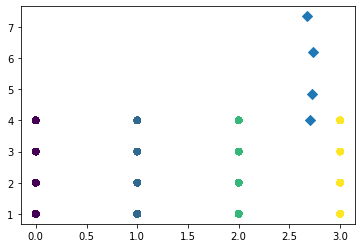

In [15]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys

xs = labels
ys = y

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# print(centroids)

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# # Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


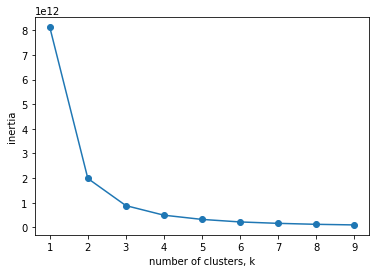

In [16]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [76]:
kmeans = KMeans(n_clusters=4, random_state = 420).fit(X_pca)
labels = kmeans.labels_
X_pca['labels'] = labels

In [84]:
X_pca

NameError: name 'X_pca' is not defined

In [83]:
sns.scatterplot(X_pca[:,0],X_pca[:,1])

NameError: name 'X_pca' is not defined

C:\Users\laura\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



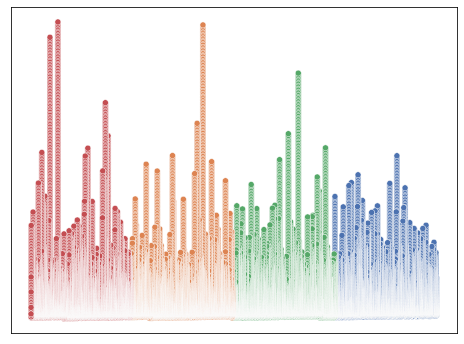

In [81]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
sns.scatterplot(0, 1, data=X_pca, hue='labels', palette = 'deep')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
ax.get_legend().remove()
plt.show()

In [84]:
import copy

X_log = copy.deepcopy(X)
X_log.iloc[:,:] = X_log.iloc[:,:].apply(lambda x: np.log1p(x), axis=1)
print('X_log: ', X_log)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_log_standard = pd.DataFrame(scaler.fit_transform(X_log))
print('X_log_standard: ', X_log_standard)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

minmaxscaler = MinMaxScaler()
normalizer = Normalizer()

X_log_minmax = pd.DataFrame(minmaxscaler.fit_transform(X_log))
X_log_normal = pd.DataFrame(normalizer.fit_transform(X_log))
print('X_log_minmax: ', X_log_minmax)
print('X_log_normal: ', X_log_normal)


X_log:           weekday     month       day     order   country  session ID  \
0       0.693147  1.609438  0.693147  0.693147  3.401197    0.693147   
1       0.693147  1.609438  0.693147  1.098612  3.401197    0.693147   
2       0.693147  1.609438  0.693147  1.386294  3.401197    0.693147   
3       0.693147  1.609438  0.693147  1.609438  3.401197    0.693147   
4       0.693147  1.609438  0.693147  1.791759  3.401197    0.693147   
...          ...       ...       ...       ...       ...         ...   
165469  1.098612  2.197225  2.639057  0.693147  3.401197   10.086850   
165470  1.098612  2.197225  2.639057  0.693147  2.302585   10.086892   
165471  1.098612  2.197225  2.639057  0.693147  3.555348   10.086933   
165472  1.098612  2.197225  2.639057  1.098612  3.555348   10.086933   
165473  1.098612  2.197225  2.639057  1.386294  3.555348   10.086933   

          colour  location  model photography      page    labels  
0       0.693147  1.791759           0.693147  0.693147  0.

**PCA**

In [22]:
from sklearn.decomposition import PCA

def PCA_test(X):
    pca = PCA(n_components=10).fit(X)
    plt.figure(figsize=(9,6))
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.axhline(y=0.95, color='r', linestyle='-')
    plt.text(0.5, 0.97, '95% cut-off threshold', color = 'red', fontsize=16)
    treshold = np.abs(np.cumsum(pca.explained_variance_ratio_)-0.95).argmin() + 1
    print("Number of components that explain 95% variance: {}".format(treshold));

Number of components that explain 95% variance: 8


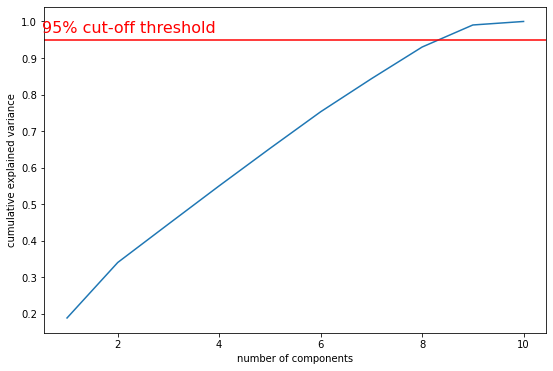

In [23]:
# dane zlogarytmowane po standaryzacji StandardScalerem
PCA_test(X_log_standard)

Number of components that explain 95% variance: 7


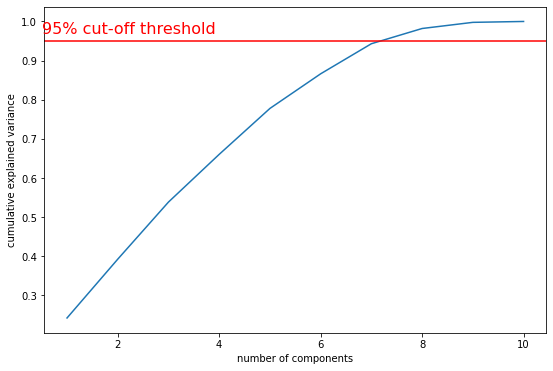

In [24]:
# dane zlogarytmowane po standaryzacji MinMaxScalerem
PCA_test(X_log_minmax)

Number of components that explain 95% variance: 6


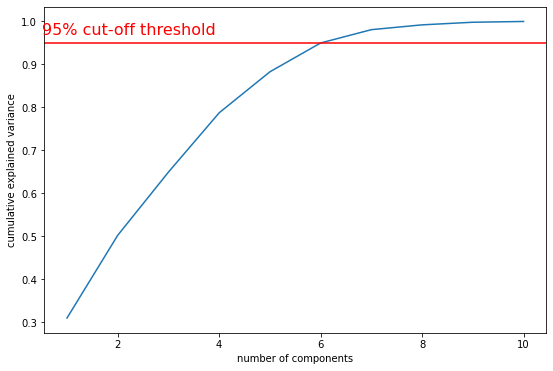

In [25]:
# dane zlogarytmowane po normalizacji wierszowej Normalizerem
PCA_test(X_log_normal)

In [86]:
X_log_normal_pca6 = pd.DataFrame(PCA(n_components=6).fit_transform(X_log_normal))
X_log_minmax_pca7 = pd.DataFrame(PCA(n_components=7).fit_transform(X_log_minmax))
X_log_std_pca8 = pd.DataFrame(PCA(n_components=8).fit_transform(X_log_standard))

print('X_log_normal_pca6: ', X_log_normal_pca6)
print('X_log_minmax_pca7: ', X_log_minmax_pca7)
print('X_log_std_pca8: ', X_log_std_pca8)


X_log_normal_pca6:                 0         1         2         3         4         5
0       0.308709  0.403614  0.195955 -0.030060  0.391362  0.062389
1       0.377352  0.358248  0.184129 -0.030906  0.388485  0.089416
2       0.455800  0.432486  0.271072  0.120471  0.095049 -0.037012
3       0.478032  0.392524  0.238856  0.079403  0.204088  0.101222
4       0.505906  0.343931  0.218554  0.050548  0.214156 -0.000685
...          ...       ...       ...       ...       ...       ...
165469 -0.142031  0.000943 -0.048860 -0.017814  0.032155  0.019223
165470 -0.154287 -0.027556 -0.051919 -0.007618 -0.031681  0.058688
165471 -0.142535  0.004284 -0.043344 -0.007088 -0.003785 -0.054816
165472 -0.089481  0.033477 -0.011728  0.036859 -0.066432 -0.044722
165473 -0.088580 -0.020362 -0.047216 -0.008054 -0.003899 -0.054739

[165474 rows x 6 columns]
X_log_minmax_pca7:                 0         1         2         3         4         5         6
0       0.937852 -0.333843 -0.485892  0.268153 -0.40

**T-SNE**

In [27]:
# from sklearn.manifold import TSNE
# import plotly.express as px

# perplexities = [50,100,150,200]

# def test_tsne(X, perplexity, color):
#     tsne = TSNE(n_components=3,perplexity=perplexity)
#     print('1')
# #     transformed = tsne.fit_transform(X)
#     transformed = tsne.fit(X)
#     print('2')
#     fig = px.scatter_3d(
#     transformed, x=0, y=1, z=2, color=color,
#     labels={'0': 'X', '1': 'Y', '2': 'Z'},
#     title = "3d T-SNE plot for perplexity={}".format(perplexity)
#     )
#     print('3')
#     fig.show()
    
# def draw_tsne(X, y):
#     j = 0
#     fig,ax = plt.subplots(2,2)
#     for i in range(4):
#         a,b = divmod(j, 2)
#         ax[a,b] = test_tsne(X, perplexities[i], y)
#         j+=1

In [28]:
# # draw_tsne(data)

# # test_tsne(X, 500, y)

# tsne = TSNE()
# print('1')
# transformed = tsne.fit_transform(X)
# print(transformed)
# # transformed = tsne.fit(X)


**Klasteryzacja**

In [92]:
# from scipy.cluster.hierarchy import linkage, fcluster

# # funkcja klasteryzuje dane metodą hierarchiczną
# def hierarchy_clustering(df, method='ward', metric='euclidean'):
# #     if 'cluster_labels' in df:
# #         df.drop('cluster_labels', axis=1, inplace=True)
#     distance_matrix = linkage(df, method = method, metric = metric)
#     cluster_labels = fcluster(distance_matrix, 2, criterion='maxclust')
#     return df, cluster_labels

# df, cluster_labels = hierarchy_clustering(X_log)
# print(df)

In [99]:
from scipy.cluster.vq import kmeans, vq

# funkcja klasteryzuje dane metodą K-means
def kmeans_clustering(df) :
#     if 'cluster_labels' in df:
#         df.drop('cluster_labels', axis=1, inplace=True)
    cluster_centers, distortion = kmeans(df, 4)
    cluster_labels, distortion_list = vq(df, cluster_centers)
    return df, cluster_labels

df, cluster_labels = kmeans_clustering(X_log)
print(df)

         weekday     month       day     order   country  session ID  \
0       0.693147  1.609438  0.693147  0.693147  3.401197    0.693147   
1       0.693147  1.609438  0.693147  1.098612  3.401197    0.693147   
2       0.693147  1.609438  0.693147  1.386294  3.401197    0.693147   
3       0.693147  1.609438  0.693147  1.609438  3.401197    0.693147   
4       0.693147  1.609438  0.693147  1.791759  3.401197    0.693147   
...          ...       ...       ...       ...       ...         ...   
165469  1.098612  2.197225  2.639057  0.693147  3.401197   10.086850   
165470  1.098612  2.197225  2.639057  0.693147  2.302585   10.086892   
165471  1.098612  2.197225  2.639057  0.693147  3.555348   10.086933   
165472  1.098612  2.197225  2.639057  1.098612  3.555348   10.086933   
165473  1.098612  2.197225  2.639057  1.386294  3.555348   10.086933   

          colour  location  model photography      page    labels  
0       0.693147  1.791759           0.693147  0.693147  0.000000  

In [94]:
from sklearn import cluster, datasets, mixture

# funkcja klasteryzuje dane metodą DBSCAN
def DBSCAN_clustering(X, eps=0.3):
    dbs = cluster.DBSCAN(eps=eps)
    dbs.fit(X)
    if hasattr(dbs, 'labels_'):
        y_pred = dbs.labels_.astype(np.int)
    else:
        y_pred = dbs.predict(X)
    return X, y_pred

df, cluster_labels = DBSCAN_clustering(X_log)
print(df)

         weekday     month       day     order   country  session ID  \
0       0.693147  1.609438  0.693147  0.693147  3.401197    0.693147   
1       0.693147  1.609438  0.693147  1.098612  3.401197    0.693147   
2       0.693147  1.609438  0.693147  1.386294  3.401197    0.693147   
3       0.693147  1.609438  0.693147  1.609438  3.401197    0.693147   
4       0.693147  1.609438  0.693147  1.791759  3.401197    0.693147   
...          ...       ...       ...       ...       ...         ...   
165469  1.098612  2.197225  2.639057  0.693147  3.401197   10.086850   
165470  1.098612  2.197225  2.639057  0.693147  2.302585   10.086892   
165471  1.098612  2.197225  2.639057  0.693147  3.555348   10.086933   
165472  1.098612  2.197225  2.639057  1.098612  3.555348   10.086933   
165473  1.098612  2.197225  2.639057  1.386294  3.555348   10.086933   

          colour  location  model photography      page    labels  
0       0.693147  1.791759           0.693147  0.693147  0.000000  

C:\Users\laura\AppData\Local\Temp\ipykernel_21224\804069482.py:8: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [32]:
# import hdbscan

# # funkcja klasteryzuje dane metodą HDBSCAN
# def HDBSCAN_clustering(X, min_cluster_size=5):
#     hdbs = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
#     hdbs.fit(X)
#     y_pred = hdbs.fit_predict(X)
#     return X, y_pred

# df, cluster_labels = HDBSCAN_clustering(X_log)
# print(df)

In [33]:
# # funkcja klasteryzuje dane metodą GMM
# def GMM_clustering(X, covariance_type='full'):
#     gmm = mixture.GaussianMixture(n_components=2, covariance_type=covariance_type)
#     gmm.fit(X)
#     if hasattr(gmm, 'labels_'):
#         y_pred = gmm.labels_.astype(np.int)
#     else:
#         y_pred = gmm.predict(X)
#     return X, y_pred

In [100]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

# funckja oblicza wartości Silhuette Score i Calinski Harabasz Score dla 8 ramek danych:
# def comparison(method, df1 = X, df2 = X_log, df3 = X_log_standard, df4 = X_log_minmax, df5 = X_log_normal, 
#                df6 = X_log_normal_pca6, df7 = X_log_minmax_pca8, df8 = X_log_std_pca9):
def comparison(method, df2 = X_log, df3 = X_log_standard, df4 = X_log_minmax, df5 = X_log_normal, 
               df6 = X_log_normal_pca6, df7 = X_log_minmax_pca8, df8 = X_log_std_pca9):
    
    silhuette = []
    calinski_harabasz = []
    d = {}
    arguments = locals()
    iters = list(locals().keys())[1:8]
    for i in iters:
        print(i)
        x = method(arguments[i])
#         print(*x)
#         print(silhouette_score(*x))
        silhuette.append(silhouette_score(*x))
        calinski_harabasz.append(calinski_harabasz_score(*x))
    d = {'silhuette': silhuette,'calinski_harabasz':calinski_harabasz}
    index = ['log', 'log_std', 'log_minmax', 'log_normal', 'log_normal_pca7', 'log_minmax_pca8', 'log_std_pca9']
    print #(pd.DataFrame(d, columns=['silhuette', 'calinski_harabasz'], index = index))


Klastrowanie hierarchiczne

In [101]:
X_kmeans, cluster_labels = kmeans_clustering(X_log)
print(X_kmeans)
print(cluster_labels)

         weekday     month       day     order   country  session ID  \
0       0.693147  1.609438  0.693147  0.693147  3.401197    0.693147   
1       0.693147  1.609438  0.693147  1.098612  3.401197    0.693147   
2       0.693147  1.609438  0.693147  1.386294  3.401197    0.693147   
3       0.693147  1.609438  0.693147  1.609438  3.401197    0.693147   
4       0.693147  1.609438  0.693147  1.791759  3.401197    0.693147   
...          ...       ...       ...       ...       ...         ...   
165469  1.098612  2.197225  2.639057  0.693147  3.401197   10.086850   
165470  1.098612  2.197225  2.639057  0.693147  2.302585   10.086892   
165471  1.098612  2.197225  2.639057  0.693147  3.555348   10.086933   
165472  1.098612  2.197225  2.639057  1.098612  3.555348   10.086933   
165473  1.098612  2.197225  2.639057  1.386294  3.555348   10.086933   

          colour  location  model photography      page    labels  
0       0.693147  1.791759           0.693147  0.693147  0.000000  

In [102]:
# comparison(kmeans_clustering)

df2


KeyboardInterrupt: 

In [37]:
# # funckja wizualizuje zklastrowane dane po zmniejszeniu do 2 wymiarów (metodą PCA)
# def visualisation(df, method, title):
#     data, labels = method(df)
#     sns.scatterplot(x=0, y=1, hue=labels, data = pd.DataFrame(data))
#     plt.title(title)
#     plt.show()

In [38]:
# # klastrowanie hierarchiczne
# visualisation(PCA(n_components=2).fit_transform(X_log), hierarchy_clustering, 'Hierarchical clustering using 2 clusters')

In [19]:
# import plotly.express as px
# from sklearn.decomposition import PCA

# # X = data.drop(['Browsing_duration', 'Revenue'], axis = 1)
# # mths = {"Feb":1, "Mar":2, "May":3, "June":4, "Jul":5, "Aug":6, "Sep":7, "Oct":8, "Nov":9, "Dec":10}
# # visitors = {"Returning_Visitor":1, "New_Visitor":2, "Other":3}
# # X['Month'] = X['Month'].map(mths)
# # X['VisitorType'] = X['VisitorType'].map(visitors)

# pca = PCA(n_components=3)
# comps = pca.fit_transform(X_log)
# # revs = {True:"Purchase",False:"Exit"}
# fig = px.scatter_3d(
#     np.log1p(comps), x=0, y=1, z=2, color=y,
#     labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
#     title = "3D plot after PCA"
# )
# fig.show()


NameError: name 'X_log' is not defined

C:\Users\mipec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

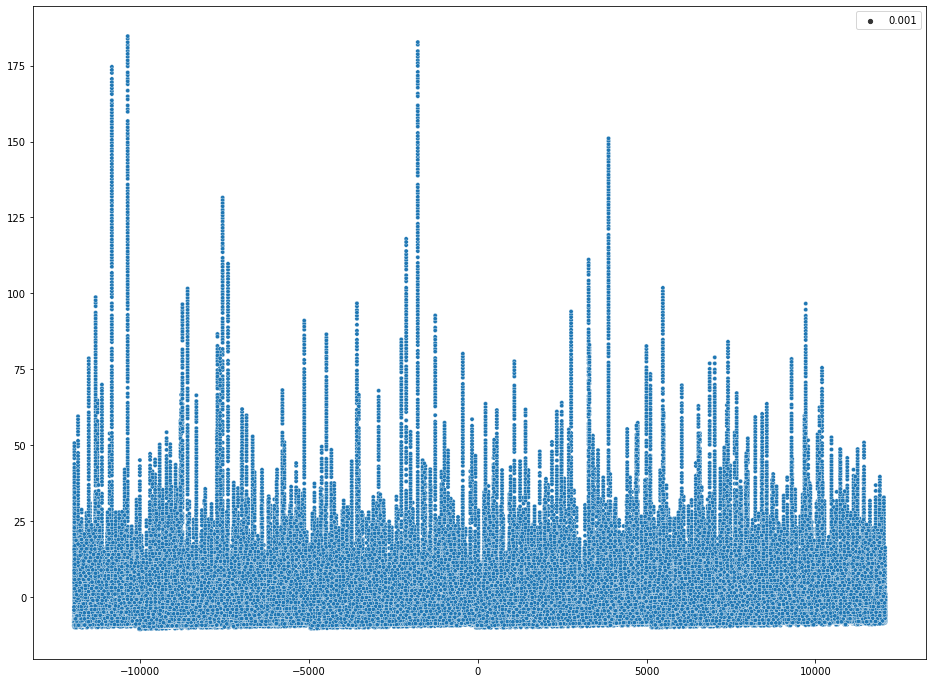

In [64]:
from sklearn.decomposition import PCA
pca = PCA()
tmp = X.sample(150000)
data_pca = pca.fit_transform(tmp)
plt.figure(figsize = (16,12))
sns.scatterplot(data_pca[:,0], data_pca[:,1], palette='tab20', size = 0.001)